In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("c:/final year poject/ADDMISSION_DATA.csv",index_col='Year',parse_dates=True)

In [ ]:
data.head()

In [7]:
data.shape

(40, 8)

In [8]:
data.index.dtype

dtype('<M8[ns]')

In [9]:
data.index

DatetimeIndex(['1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [10]:
data.index.freq='AS'

In [11]:
data.columns

Index(['Bhojpur', 'Sherpur', 'Borda', 'Kushalpura', 'Pachama', 'Kharpa',
       'Ahmadpur', 'Hirapur'],
      dtype='object')

In [12]:
data.isnull().sum()

Bhojpur       0
Sherpur       0
Borda         0
Kushalpura    0
Pachama       0
Kharpa        0
Ahmadpur      0
Hirapur       0
dtype: int64

In [13]:
data.dtypes

Bhojpur       int64
Sherpur       int64
Borda         int64
Kushalpura    int64
Pachama       int64
Kharpa        int64
Ahmadpur      int64
Hirapur       int64
dtype: object

In [14]:
data.describe()

,Bhojpur,Sherpur,Borda,Kushalpura,Pachama,Kharpa,Ahmadpur,Hirapur
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.00000
mean,37.450000,91.675000,79.925000,35.950000,45.475000,43.625000,84.55000,44.72500
std,9.940722,24.011095,17.202247,10.743991,9.909818,9.927138,23.01499,15.15389
min,12.000000,45.000000,35.000000,15.000000,11.000000,12.000000,25.00000,16.00000
25%,34.750000,88.500000,70.000000,28.500000,41.000000,37.750000,65.00000,32.00000
50%,39.000000,95.000000,81.000000,37.500000,47.000000,44.000000,91.50000,45.00000
75%,45.000000,104.750000,92.000000,43.250000,51.250000,50.000000,103.25000,53.75000
max,52.000000,143.000000,114.000000,56.000000,65.000000,65.000000,124.00000,70.00000


<Axes: >

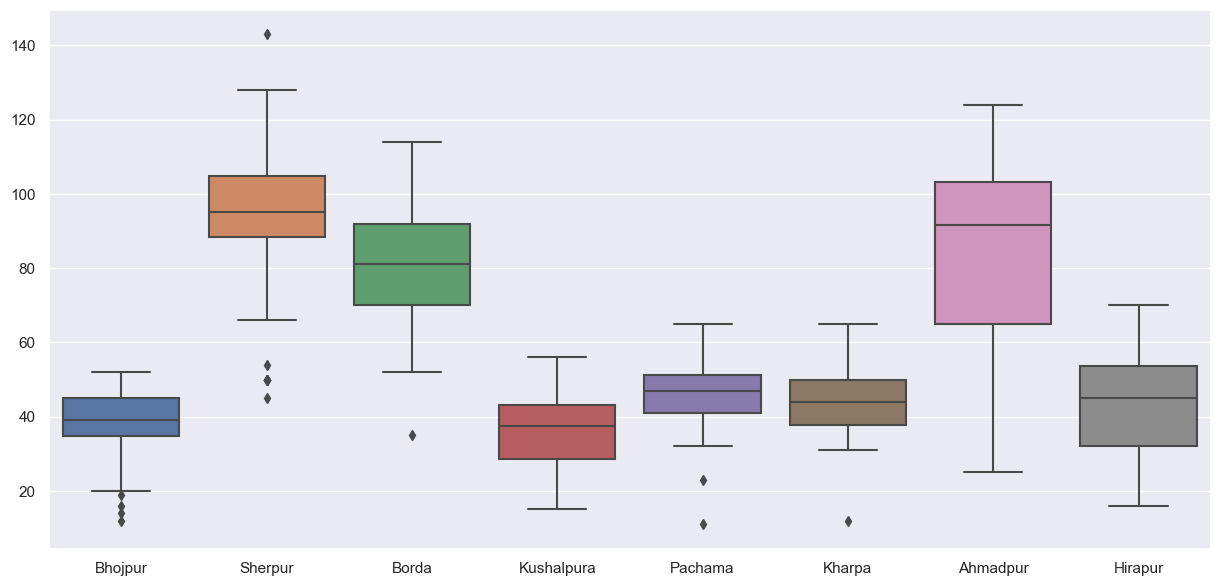

In [15]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.boxplot(data)

In [16]:
from feature_engine.outliers import Winsorizer

#apply winsorization for Sherpur column
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Sherpur'])
df1=winsor.fit_transform(data[['Sherpur']]).astype(int)
data['Sherpur']=df1


#apply winsorization for Borda column
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Borda'])
df1=winsor.fit_transform(data[['Borda']]).astype(int)
data['Borda']=df1

#apply winsorization for Kushalpura column
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Kushalpura'])
df1=winsor.fit_transform(data[['Kushalpura']]).astype(int)
data['Kushalpura']=df1


#apply winsorization for Pachama column
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Pachama'])
df1=winsor.fit_transform(data[['Pachama']]).astype(int)
data['Pachama']=df1

#apply winsorization for Kharpa column
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Kharpa'])
df1=winsor.fit_transform(data[['Kharpa']]).astype(int)
data['Kharpa']=df1


<Axes: >

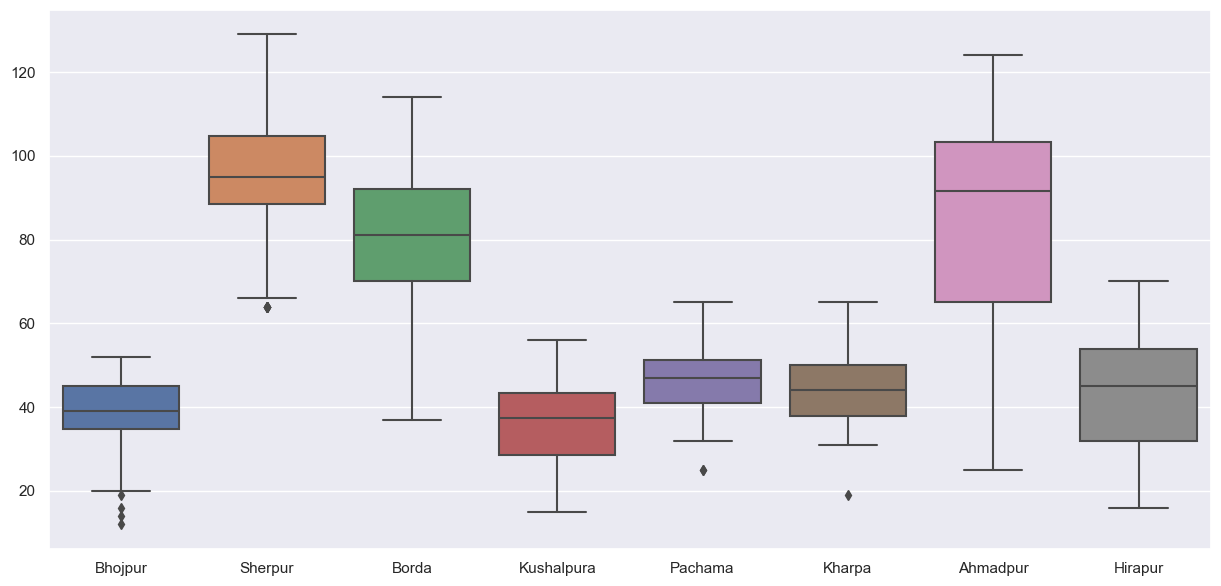

In [17]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.boxplot(data)

In [18]:

#winsorization is not working for Bhojpur
iqr=data.Bhojpur.quantile(0.75)-data.Bhojpur.quantile(0.25)
upper_limit=data.Bhojpur.quantile(0.75) + 1.5 *iqr
lower_limit=data.Bhojpur.quantile(0.25) - 1.5 *iqr
df_t=np.where(data.Bhojpur > upper_limit,upper_limit,np.where(data.Bhojpur < lower_limit ,lower_limit ,data.Bhojpur))
data['Bhojpur']=df_t


#winsorization is not working for Sherpur
iqr=data.Sherpur.quantile(0.75)-data.Sherpur.quantile(0.25)
upper_limit=data.Sherpur.quantile(0.75) + 1.5 *iqr
lower_limit=data.Sherpur.quantile(0.25) - 1.5 *iqr
df_t=np.where(data.Sherpur > upper_limit,upper_limit,np.where(data.Sherpur < lower_limit ,lower_limit ,data.Sherpur))
data['Sherpur']=df_t

#winsorization is not working for Pachama
iqr=data.Pachama.quantile(0.75)-data.Pachama.quantile(0.25)
upper_limit=data.Pachama.quantile(0.75) + 1.5 *iqr
lower_limit=data.Pachama.quantile(0.25) - 1.5 *iqr
df_t=np.where(data.Pachama > upper_limit,upper_limit,np.where(data.Pachama < lower_limit ,lower_limit ,data.Pachama))
data['Pachama']=df_t


#winsorization is not working for Kharpa 
iqr=data.Kharpa.quantile(0.75)-data.Kharpa.quantile(0.25)
upper_limit=data.Kharpa.quantile(0.75) + 1.5 *iqr
lower_limit=data.Kharpa.quantile(0.25) - 1.5 *iqr
df_t=np.where(data.Kharpa > upper_limit,upper_limit,np.where(data.Kharpa < lower_limit ,lower_limit ,data.Kharpa))
data['Kharpa']=df_t

<Axes: >

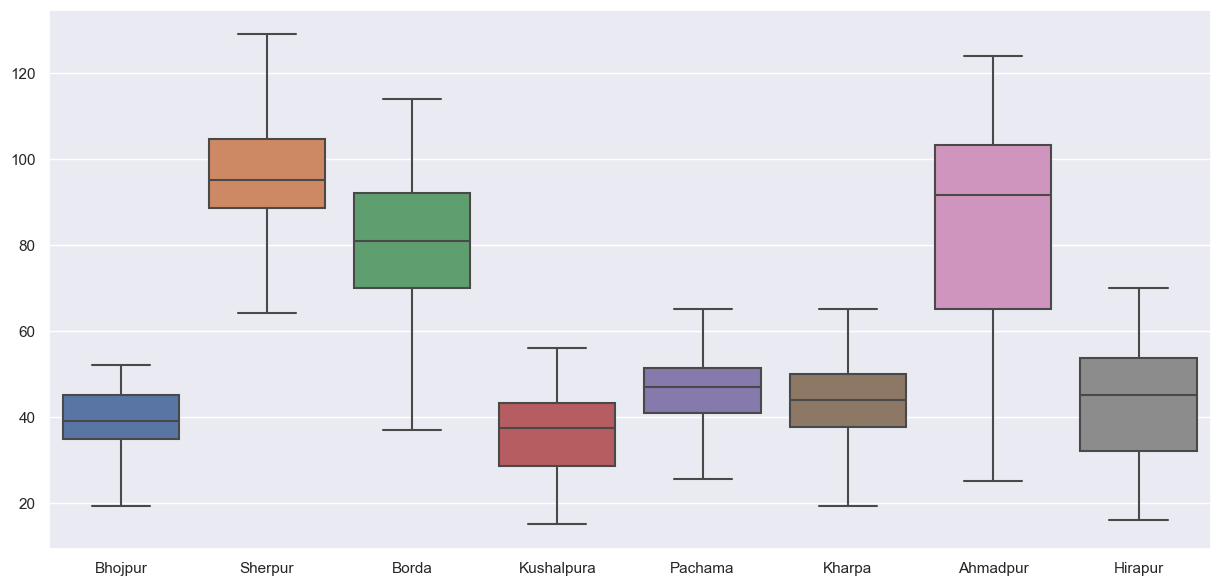

In [19]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.boxplot(data)

In [20]:
data

,Bhojpur,Sherpur,Borda,Kushalpura,Pachama,Kharpa,Ahmadpur,Hirapur
Year,,,,,,,,
1983-01-01,19.375,66.000,37,17,25.625,19.375,25,16
1984-01-01,19.375,64.125,55,29,25.625,43.000,35,21
1985-01-01,19.375,64.125,55,19,32.000,41.000,50,28
1986-01-01,19.375,76.000,70,21,41.000,37.000,71,30
1987-01-01,27.000,87.000,53,32,38.000,31.000,99,32
1988-01-01,20.000,89.000,70,29,39.000,31.000,103,35
1989-01-01,39.000,92.000,55,15,45.000,37.000,61,44
1990-01-01,43.000,64.125,62,43,41.000,36.000,76,45
1991-01-01,41.000,64.125,62,23,42.000,36.000,73,46


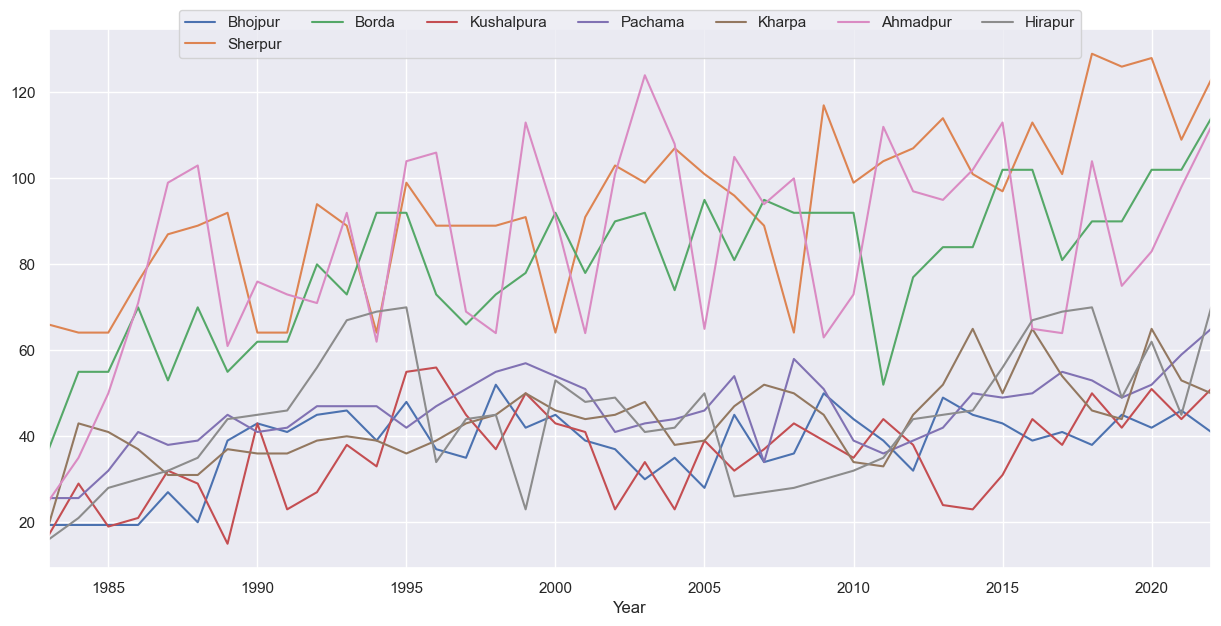

In [21]:
ax=data[['Bhojpur', 'Sherpur', 'Borda', 'Kushalpura', 'Pachama', 'Kharpa',
       'Ahmadpur', 'Hirapur']].plot()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

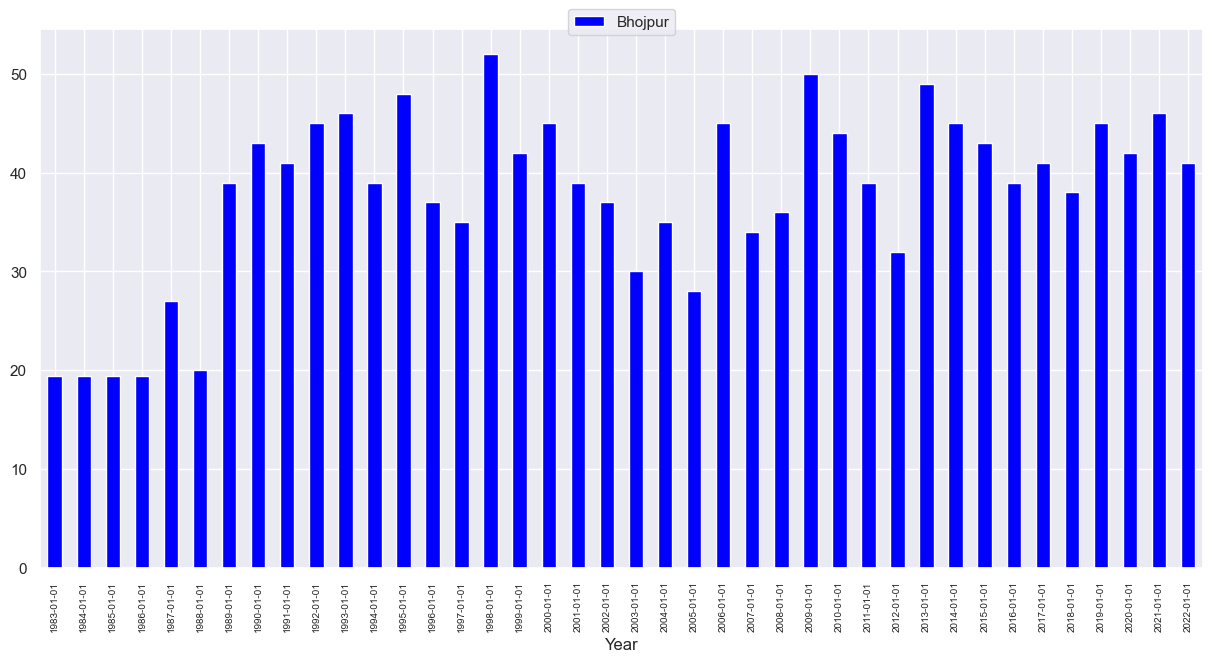

In [22]:
ax = data.Bhojpur.plot( kind='bar',color='blue')
ax.set_xticklabels(data.index.format(), rotation='vertical', size=7.2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

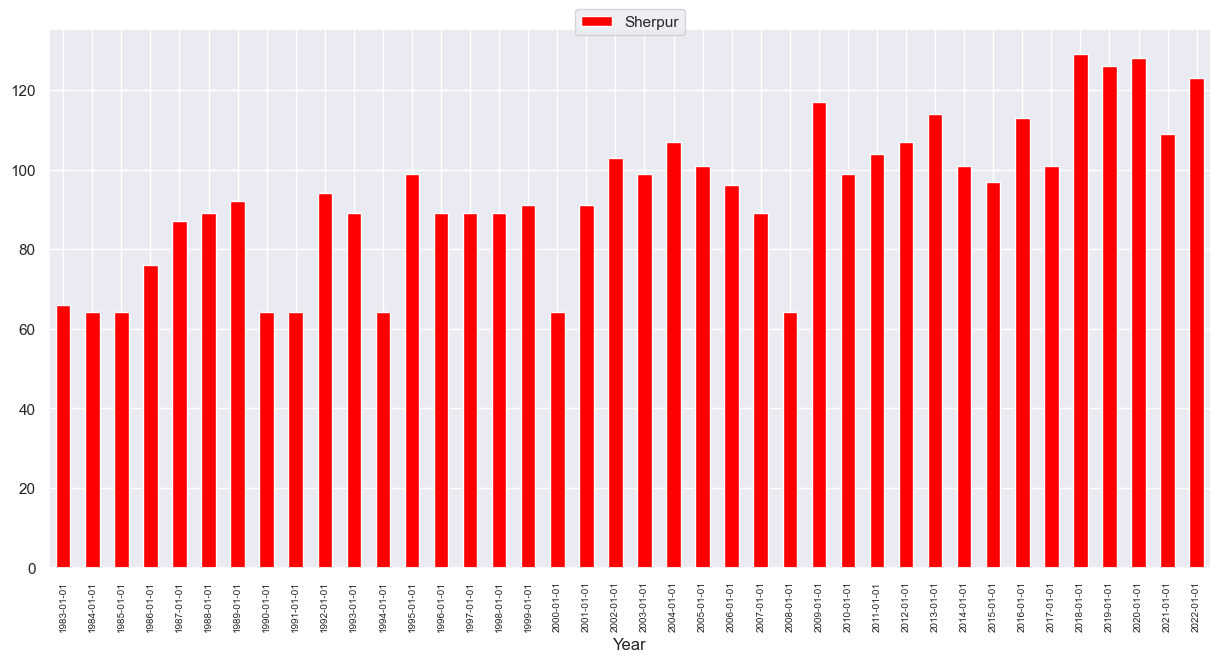

In [23]:
ax = data.Sherpur.plot( kind='bar',color='Red')
ax.set_xticklabels(data.index.format(), rotation='vertical', size=7.2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

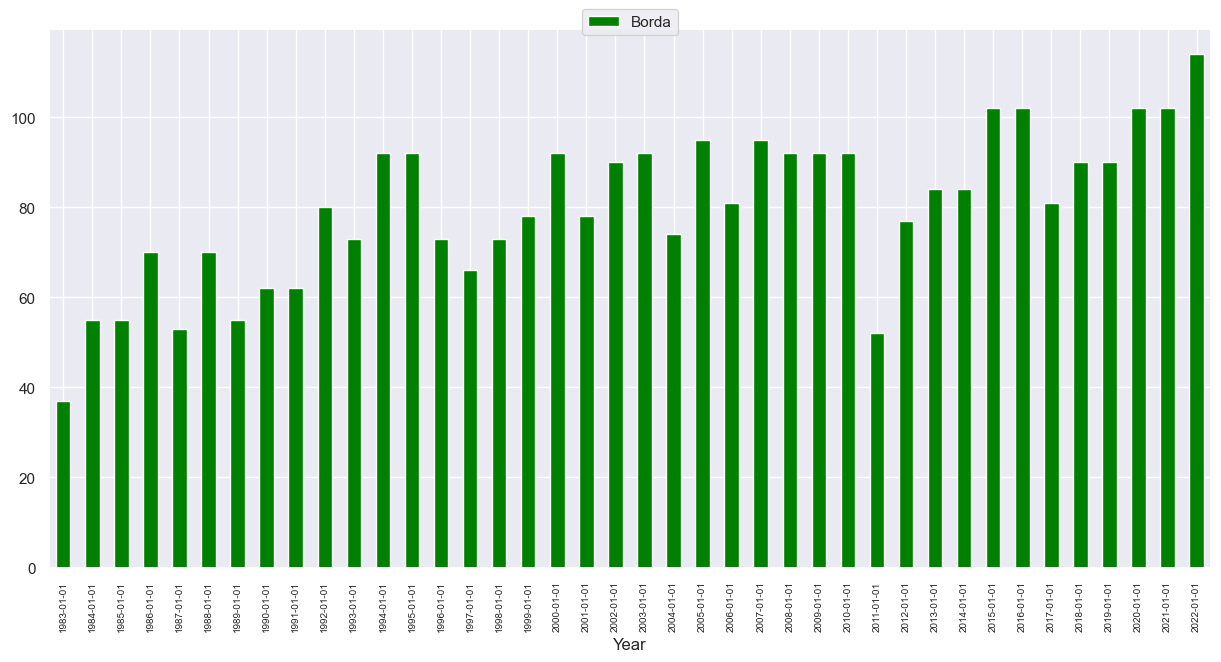

In [24]:
ax = data.Borda.plot( kind='bar',color='green')
ax.set_xticklabels(data.index.format(), rotation='vertical', size=7.2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

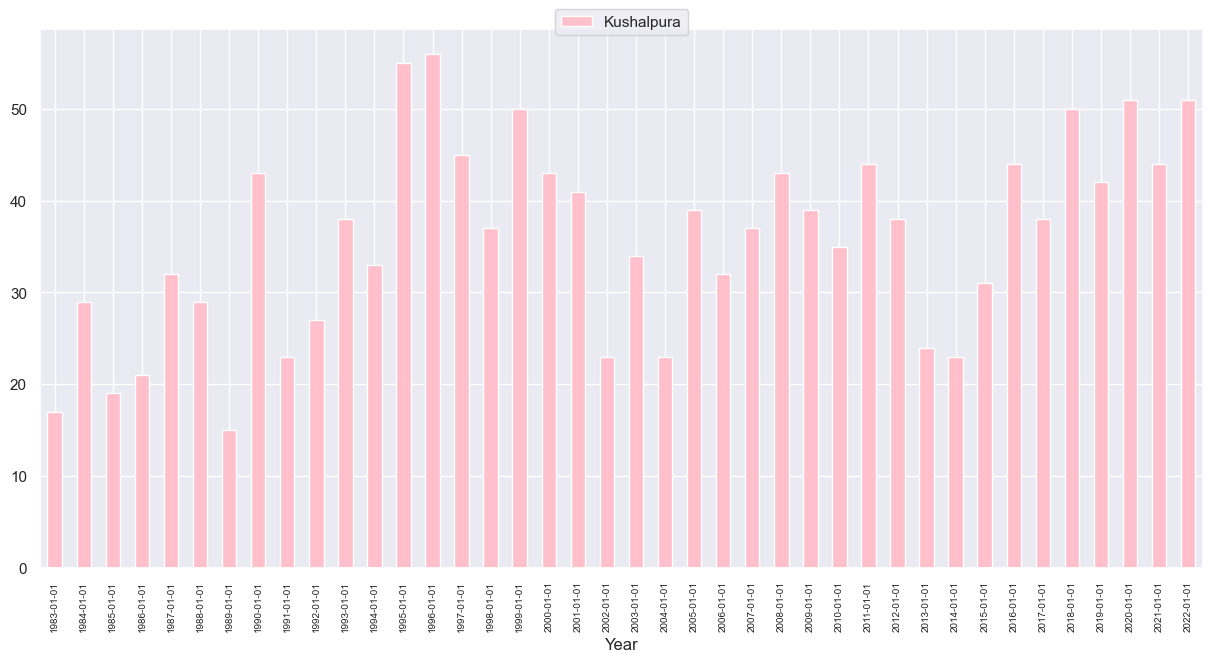

In [25]:
ax = data.Kushalpura.plot( kind='bar',color='pink')
ax.set_xticklabels(data.index.format(), rotation='vertical', size=7.2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

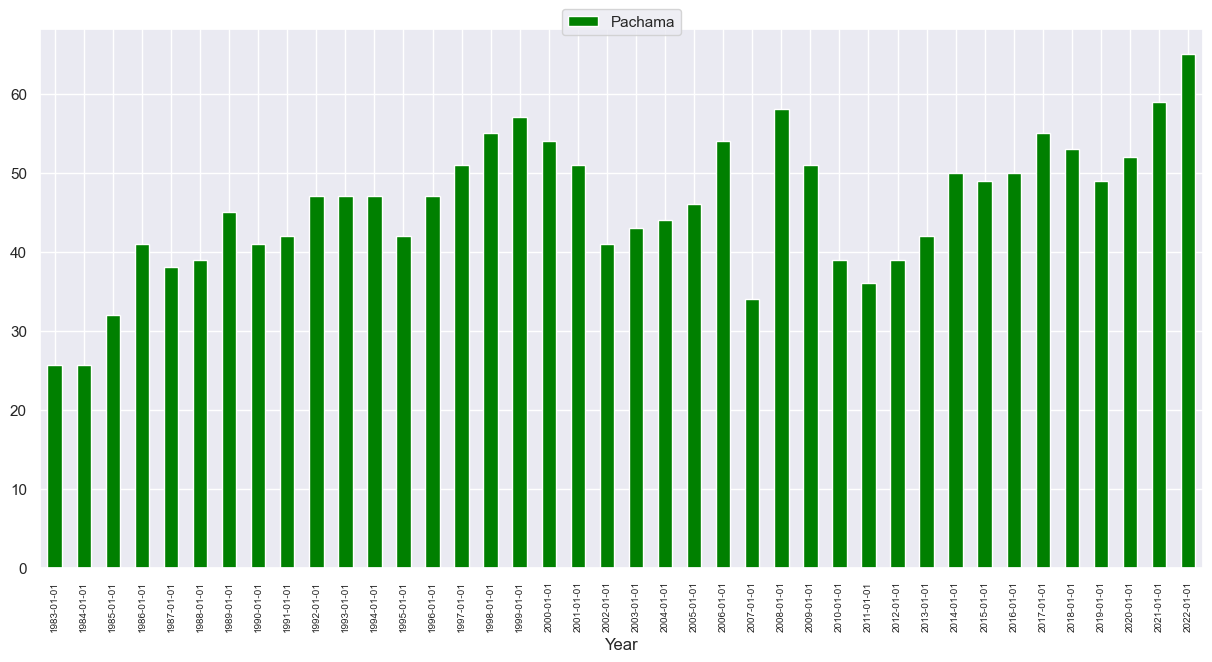

In [26]:
ax = data.Pachama.plot( kind='bar',color='green')
ax.set_xticklabels(data.index.format(), rotation='vertical', size=7.2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

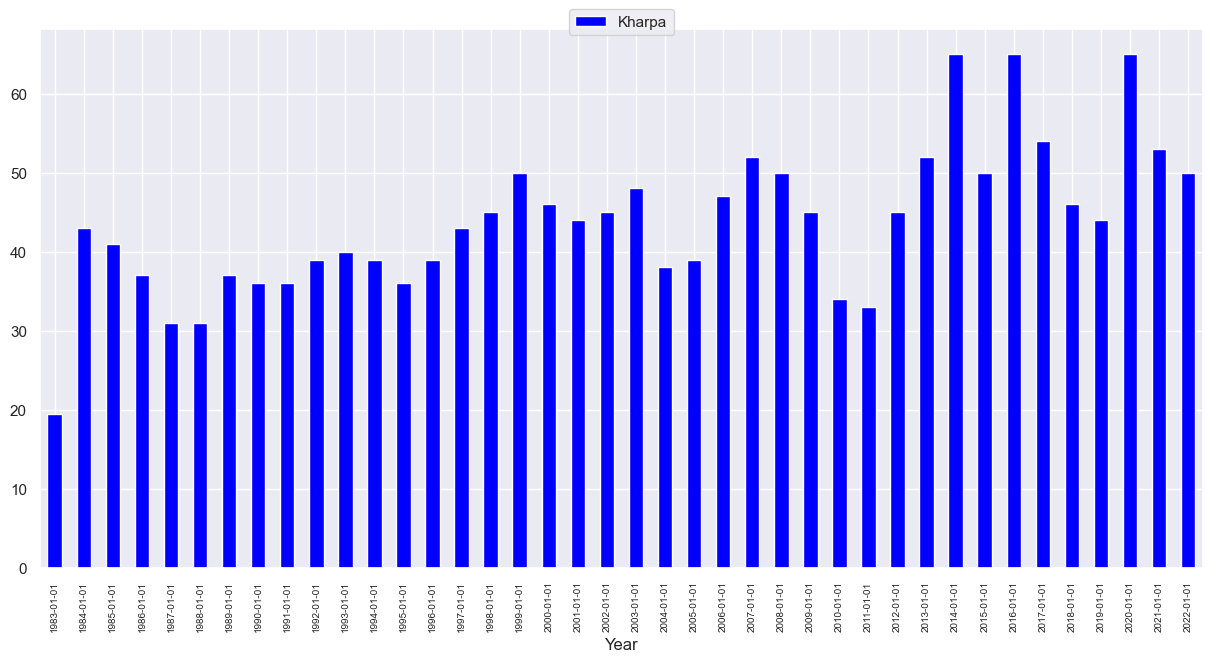

In [27]:
ax = data.Kharpa.plot( kind='bar',color='blue')
ax.set_xticklabels(data.index.format(), rotation='vertical', size=7.2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

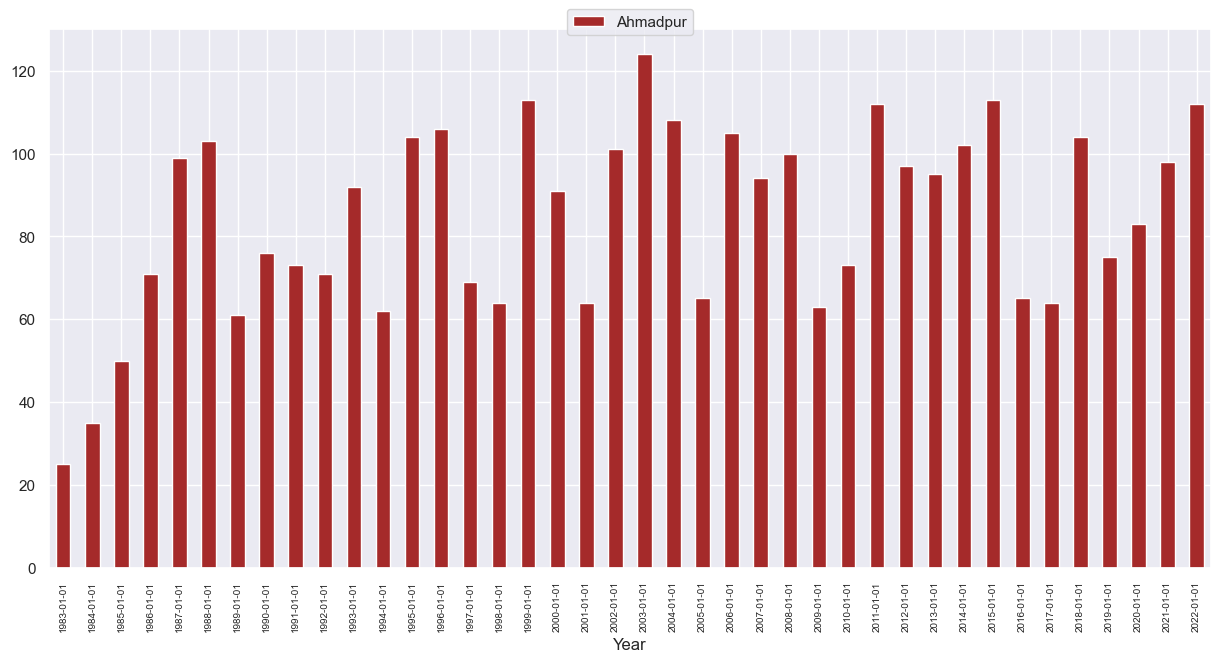

In [28]:
ax = data.Ahmadpur.plot( kind='bar',color='brown')
ax.set_xticklabels(data.index.format(), rotation='vertical', size=7.2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

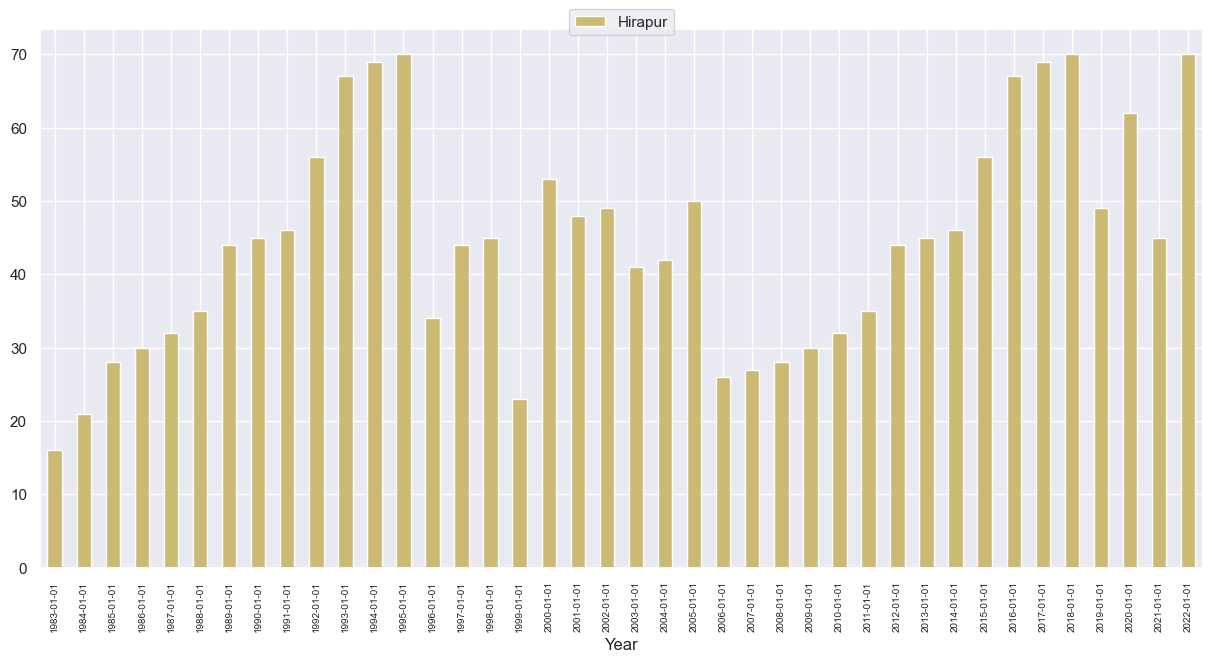

In [29]:
ax = data.Hirapur.plot( kind='bar',color='y')
ax.set_xticklabels(data.index.format(), rotation='vertical', size=7.2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

Bhojpur

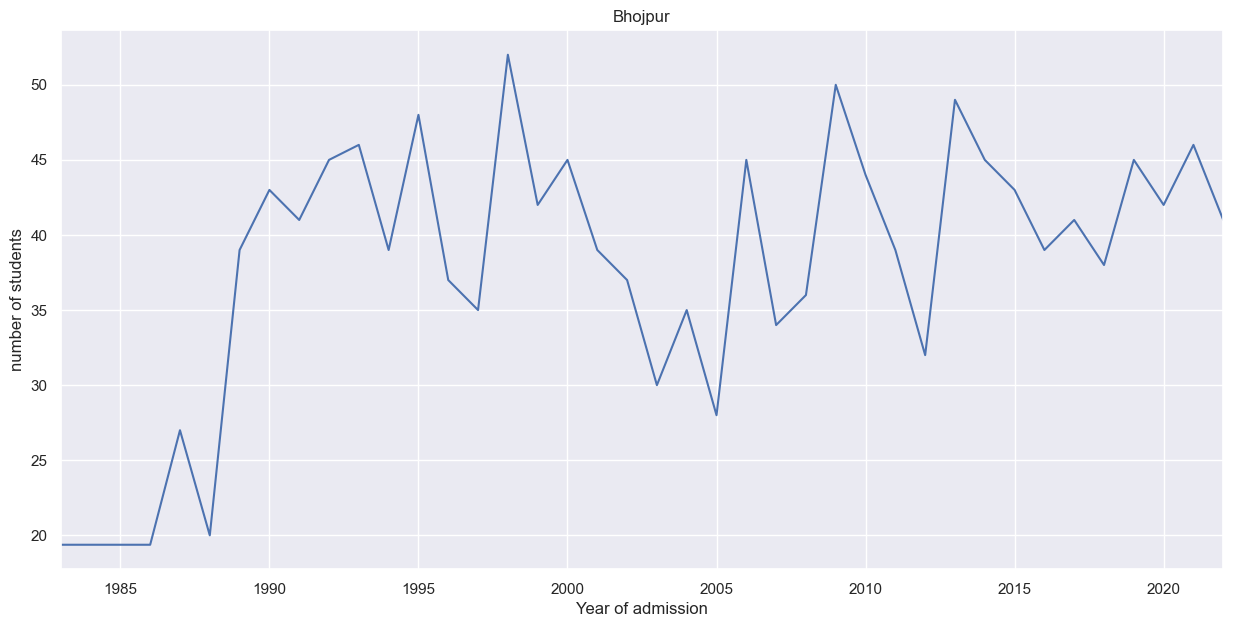

In [30]:

data['Bhojpur'].plot()
plt.title('Bhojpur')
plt.xlabel('Year of admission')
plt.ylabel('number of students')
plt.show()

In [31]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Bhojpur'],autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -3.547871
p-value:   0.006839
crtical values
1% -3.610399601308181
5% -2.939108945868946
10% -2.6080629651545038
reject the null hypothesis
as the p-value is less than 0.05 the time series is stationary


Sherpur

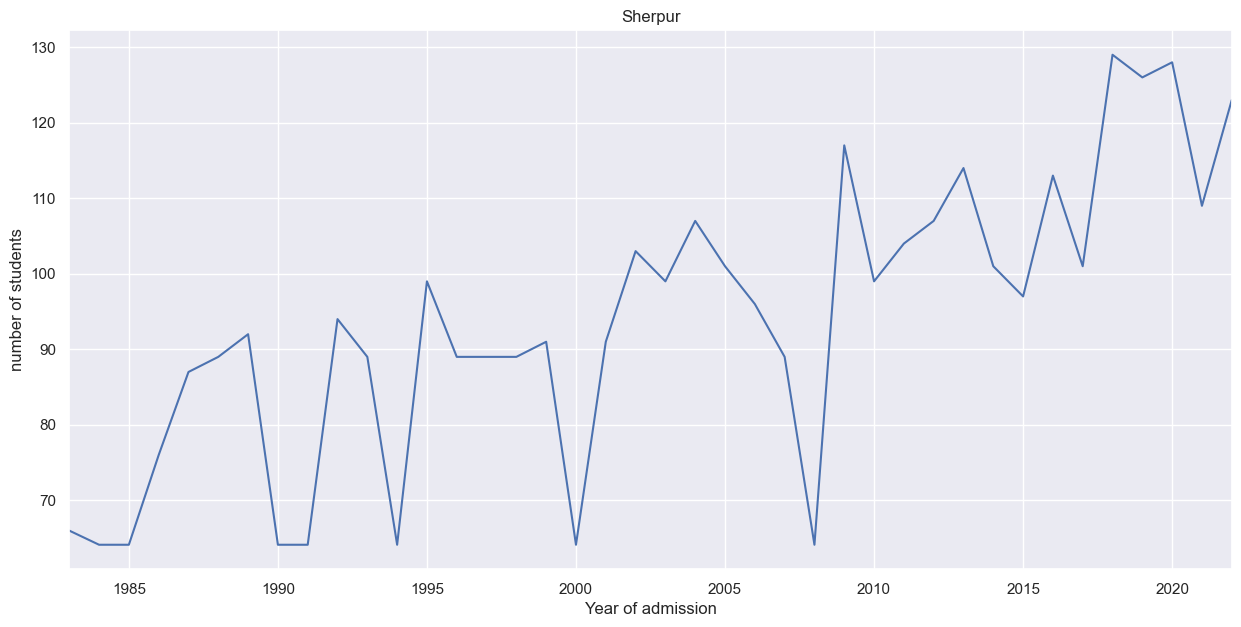

In [32]:

data['Sherpur'].plot()
plt.title('Sherpur')
plt.xlabel('Year of admission')
plt.ylabel('number of students')
plt.show()

In [33]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Sherpur'],autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: 1.377515
p-value:   0.997010
crtical values
1% -3.6699197407407405
5% -2.9640707407407407
10% -2.621171111111111
Not Stationary
fail to reject the null hypothesis


In [34]:
data['Sherpur_first_diff']=data['Sherpur']-data['Sherpur'].shift(1)

In [35]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Sherpur_first_diff'].dropna(),autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -4.653233
p-value:   0.000103
crtical values
1% -3.661428725118324
5% -2.960525341210433
10% -2.6193188033298647
reject the null hypothesis
as the p-value is less than 0.05 the time series is stationary


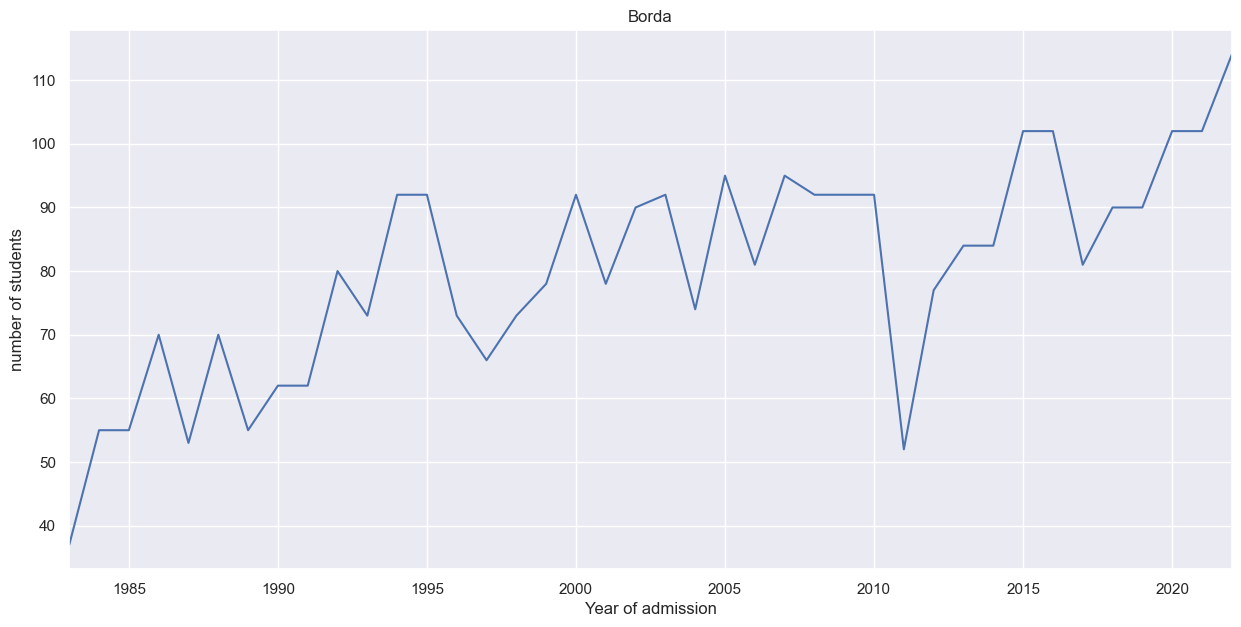

In [50]:

data['Borda'].plot()
plt.title('Borda')
plt.xlabel('Year of admission')
plt.ylabel('number of students')
plt.show()

In [51]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Borda'],autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -3.254555
p-value:   0.017036
crtical values
1% -3.610399601308181
5% -2.939108945868946
10% -2.6080629651545038
reject the null hypothesis
as the p-value is less than 0.05 the time series is stationary


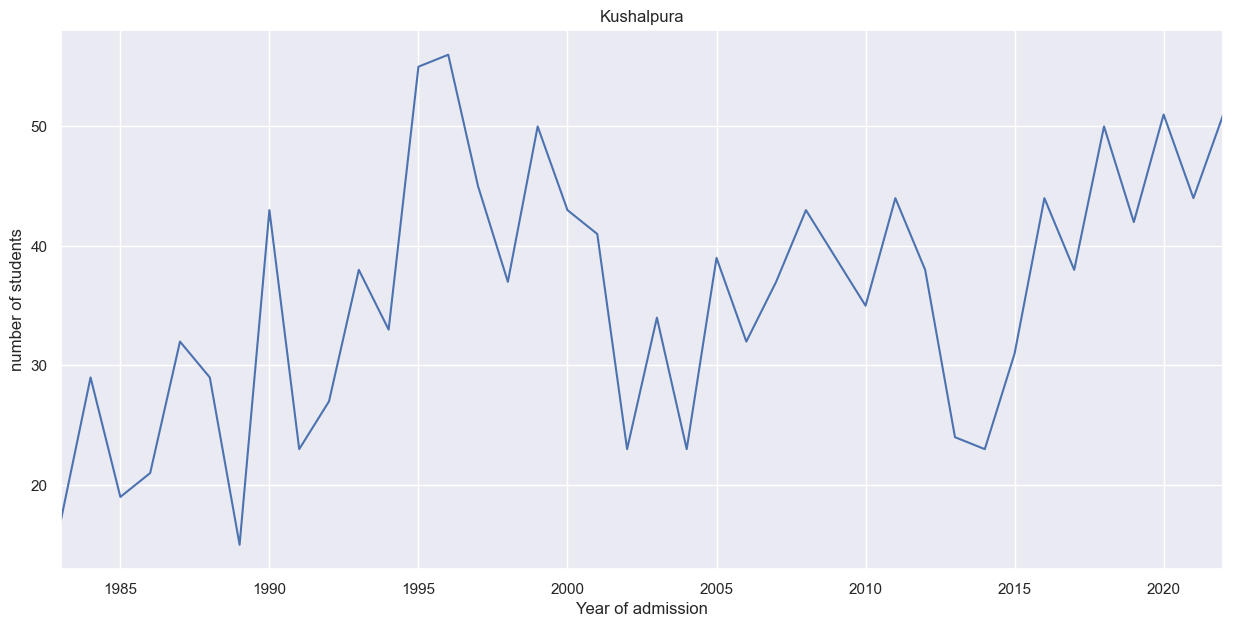

In [52]:

data['Kushalpura'].plot()
plt.title('Kushalpura')
plt.xlabel('Year of admission')
plt.ylabel('number of students')
plt.show()

In [53]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Kushalpura'],autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -3.909378
p-value:   0.001967
crtical values
1% -3.610399601308181
5% -2.939108945868946
10% -2.6080629651545038
reject the null hypothesis
as the p-value is less than 0.05 the time series is stationary


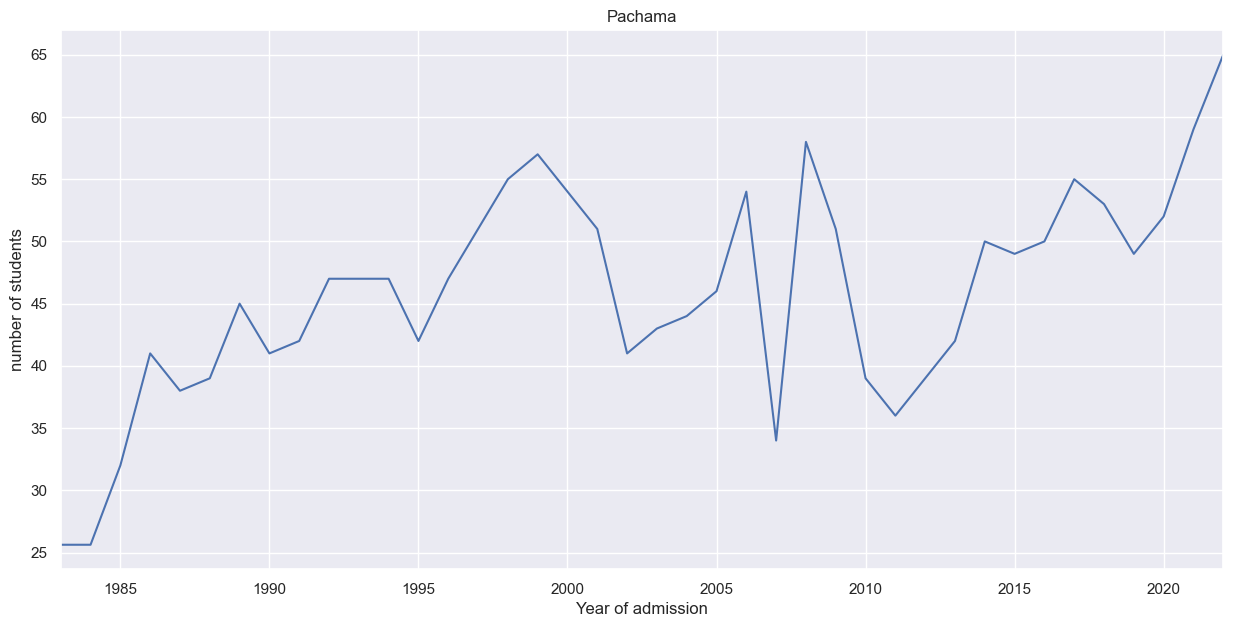

In [54]:
data['Pachama'].plot()
plt.title('Pachama')
plt.xlabel('Year of admission')
plt.ylabel('number of students')
plt.show()

In [55]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Pachama'],autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -2.957638
p-value:   0.039044
crtical values
1% -3.610399601308181
5% -2.939108945868946
10% -2.6080629651545038
reject the null hypothesis
as the p-value is less than 0.05 the time series is stationary


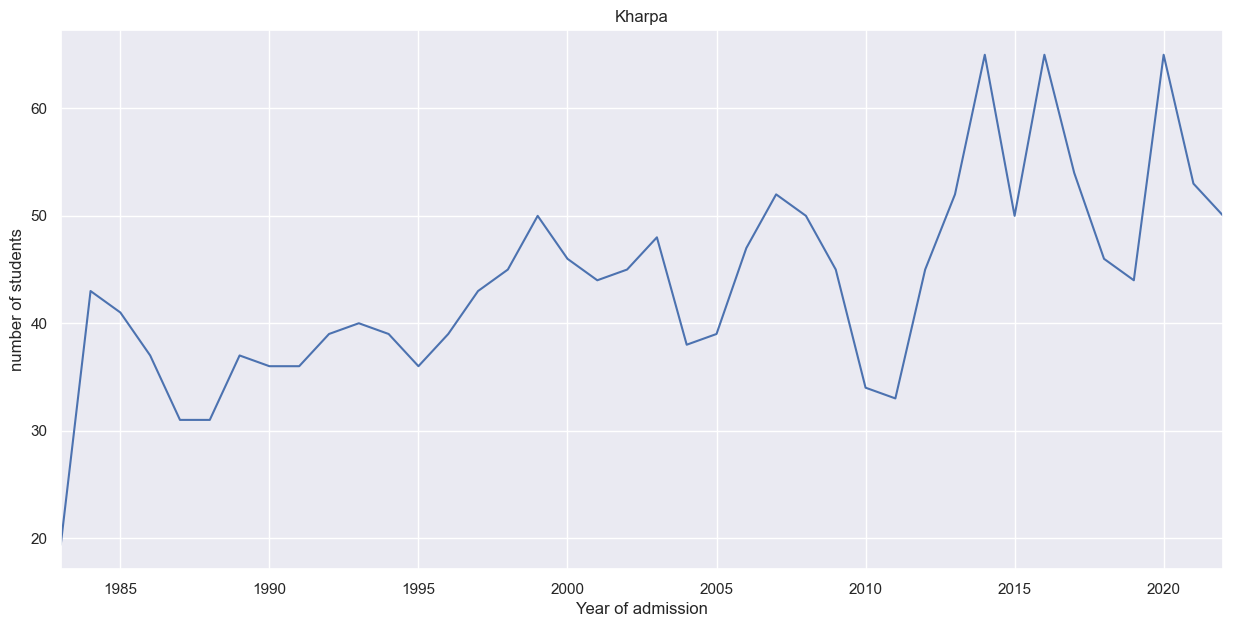

In [56]:
data['Kharpa'].plot()
plt.title('Kharpa')
plt.xlabel('Year of admission')
plt.ylabel('number of students')
plt.show()

In [57]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Kharpa'],autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -3.889705
p-value:   0.002112
crtical values
1% -3.610399601308181
5% -2.939108945868946
10% -2.6080629651545038
reject the null hypothesis
as the p-value is less than 0.05 the time series is stationary


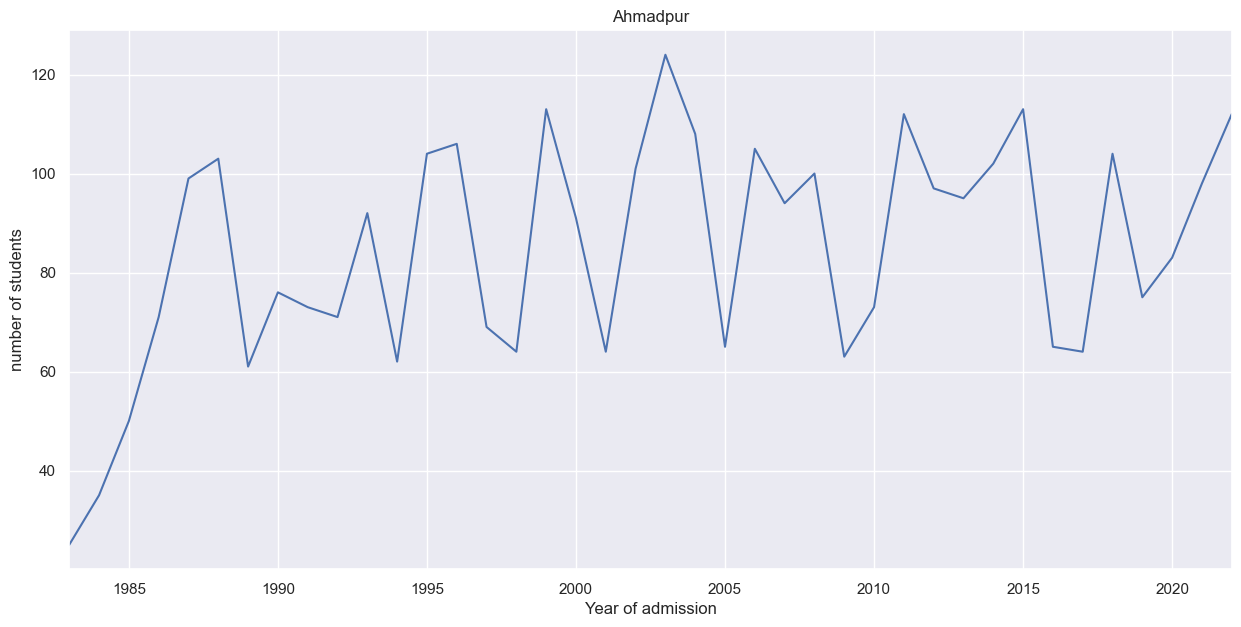

In [58]:
data['Ahmadpur'].plot()
plt.title('Ahmadpur')
plt.xlabel('Year of admission')
plt.ylabel('number of students')
plt.show()

In [59]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Ahmadpur'],autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -3.019975
p-value:   0.033071
crtical values
1% -3.661428725118324
5% -2.960525341210433
10% -2.6193188033298647
reject the null hypothesis
as the p-value is less than 0.05 the time series is stationary


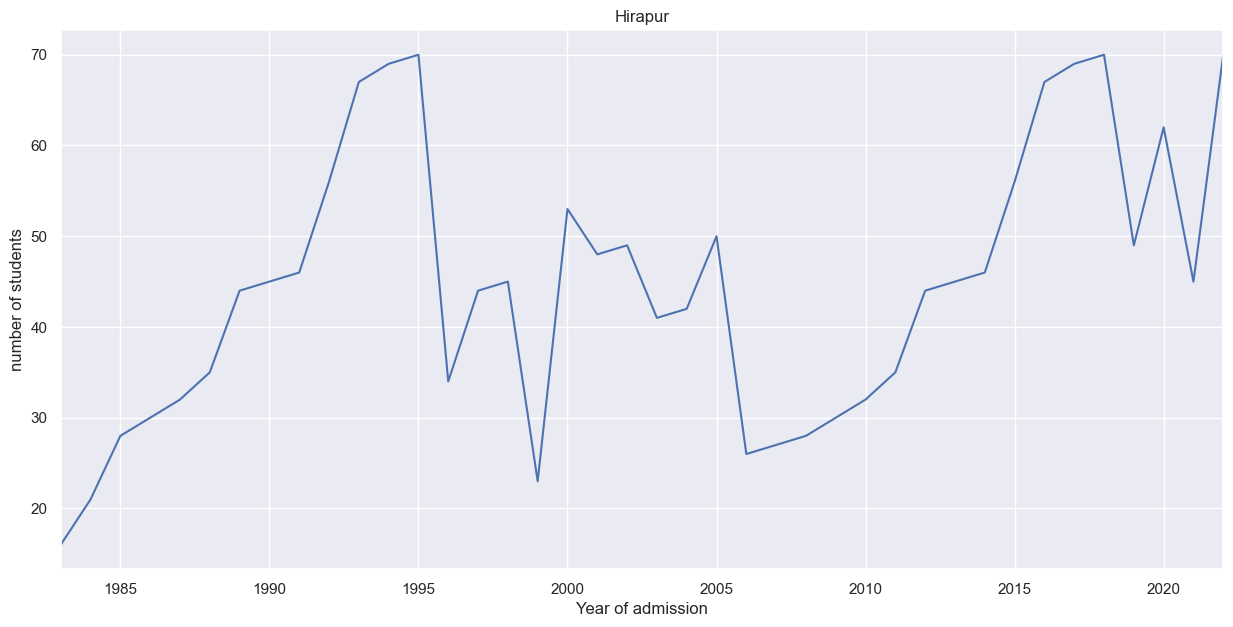

In [60]:
data['Hirapur'].plot()
plt.title('Hirapur')
plt.xlabel('Year of admission')
plt.ylabel('number of students')
plt.show()

In [61]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Hirapur'],autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -2.222569
p-value:   0.198156
crtical values
1% -3.6155091011809297
5% -2.941262357486514
10% -2.6091995013850418
Not Stationary
fail to reject the null hypothesis


In [62]:
data['Hirapur_first_diff']=data['Hirapur']-data['Hirapur'].shift(1)

In [63]:

#import adfuller from stats models
from statsmodels.tsa.stattools import adfuller

#performance of augumented dicky fuller test
print("Result of Dicky fuller test")
result=adfuller(data['Hirapur_first_diff'].dropna(),autolag='AIC')
print("ADF statistics: %f"%result[0])
print("p-value:   %f"%result[1])
print("crtical values")
for key,value in result[4].items():
    print(key,value)
if result[1] <= 0.05:
    print('reject the null hypothesis')
    print("as the p-value is less than 0.05 the time series is stationary")
else:
    print('Not Stationary')
    print('fail to reject the null hypothesis')
    

Result of Dicky fuller test
ADF statistics: -8.514978
p-value:   0.000000
crtical values
1% -3.6155091011809297
5% -2.941262357486514
10% -2.6091995013850418
reject the null hypothesis
as the p-value is less than 0.05 the time series is stationary


# Train and Test Data

In [64]:
train=data.loc[:'2015']
test=data.loc['2015':]

In [65]:
test

,Bhojpur,Sherpur,Borda,Kushalpura,Pachama,Kharpa,Ahmadpur,Hirapur,Sherpur_first_diff,Hirapur_first_diff
Year,,,,,,,,,,
2015-01-01,43.0,97.0,102,31,49.0,50.0,113,56,-4.0,10.0
2016-01-01,39.0,113.0,102,44,50.0,65.0,65,67,16.0,11.0
2017-01-01,41.0,101.0,81,38,55.0,54.0,64,69,-12.0,2.0
2018-01-01,38.0,129.0,90,50,53.0,46.0,104,70,28.0,1.0
2019-01-01,45.0,126.0,90,42,49.0,44.0,75,49,-3.0,-21.0
2020-01-01,42.0,128.0,102,51,52.0,65.0,83,62,2.0,13.0
2021-01-01,46.0,109.0,102,44,59.0,53.0,98,45,-19.0,-17.0
2022-01-01,41.0,123.0,114,51,65.0,50.0,112,70,14.0,25.0


In [66]:
prd_start=test.index[0]
prd_end=test.index[-1]
print(prd_start)
print(prd_end)

2015-01-01 00:00:00
2022-01-01 00:00:00



# Bhojpur

In [67]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_Bhojpur1=ARIMA(train['Bhojpur'],order=(9, 2, 8)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Bhojpur2=ARIMA(train['Bhojpur'],order=(4, 3, 4)).fit()

from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Bhojpur1 = SARIMAX(train['Bhojpur'],order=(1, 0, 1),seasonal_order=(1,0,1,12)).fit()


C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
prd1=model_arima_Bhojpur1.predict(start=prd_start,end=prd_end)
prd2=model_arima_Bhojpur2.predict(start=prd_start,end=prd_end)
prd3=model_SARIMAX_Bhojpur1.predict(start=prd_start,end=prd_end)

In [69]:
test['prd_Bhojpur_ARIMA_1']=prd1
test['prd_Bhojpur_ARIMA_2']=prd2
test['prd_Bhojpur_SARIMAX_1']=prd3

In [70]:
test[['Bhojpur','prd_Bhojpur_ARIMA_1','prd_Bhojpur_ARIMA_2','prd_Bhojpur_SARIMAX_1']]

,Bhojpur,prd_Bhojpur_ARIMA_1,prd_Bhojpur_ARIMA_2,prd_Bhojpur_SARIMAX_1
Year,,,,
2015-01-01,43.0,45.164101,46.796112,47.502747
2016-01-01,39.0,40.834536,39.938900,44.653935
2017-01-01,41.0,66.821789,47.664490,46.831800
2018-01-01,38.0,48.556128,40.569570,39.539048
2019-01-01,45.0,47.274147,44.584271,44.823244
2020-01-01,42.0,51.918165,41.951918,41.705935
2021-01-01,46.0,52.283018,43.503956,37.848139
2022-01-01,41.0,51.112451,41.860277,42.927412


In [71]:
test[['Bhojpur','prd_Bhojpur_ARIMA_1','prd_Bhojpur_ARIMA_2','prd_Bhojpur_SARIMAX_1']]

,Bhojpur,prd_Bhojpur_ARIMA_1,prd_Bhojpur_ARIMA_2,prd_Bhojpur_SARIMAX_1
Year,,,,
2015-01-01,43.0,45.164101,46.796112,47.502747
2016-01-01,39.0,40.834536,39.938900,44.653935
2017-01-01,41.0,66.821789,47.664490,46.831800
2018-01-01,38.0,48.556128,40.569570,39.539048
2019-01-01,45.0,47.274147,44.584271,44.823244
2020-01-01,42.0,51.918165,41.951918,41.705935
2021-01-01,46.0,52.283018,43.503956,37.848139
2022-01-01,41.0,51.112451,41.860277,42.927412


<Axes: xlabel='Year'>

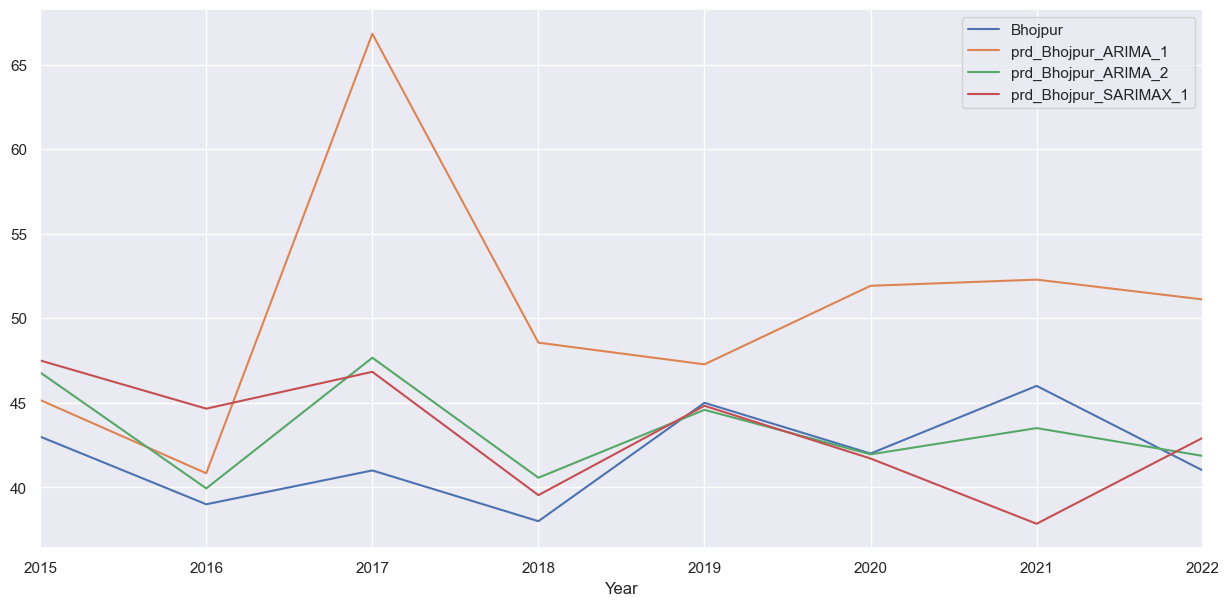

In [72]:
test[['Bhojpur','prd_Bhojpur_ARIMA_1','prd_Bhojpur_ARIMA_2','prd_Bhojpur_SARIMAX_1']].plot()

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
ARIMA1_RMSE=np.sqrt(mean_squared_error(test['Bhojpur'],test['prd_Bhojpur_ARIMA_1']))
ARIMA2_RMSE=np.sqrt(mean_squared_error(test['Bhojpur'],test['prd_Bhojpur_ARIMA_2']))
SARIMAX1_RMSE=np.sqrt(mean_squared_error(test['Bhojpur'],test['prd_Bhojpur_SARIMAX_1']))

In [74]:
print(ARIMA1_RMSE)
print(ARIMA2_RMSE)
print(SARIMAX1_RMSE)

11.355203742459539
3.030172658579237
4.456816956732077


In [75]:
import joblib
joblib.dump(model_arima_Bhojpur2,'Bhojpur.pkl')

['Bhojpur.pkl']

# Sherpur

In [76]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_Sherpur1=ARIMA(train['Sherpur'],order=(9, 2, 8)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Sherpur2=ARIMA(train['Sherpur'],order=(7, 3, 11)).fit()

from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Sherpur1 = SARIMAX(train['Sherpur'],order=(1, 0, 1),seasonal_order=(1,0,1,12)).fit()


C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
prd1=model_arima_Sherpur1.predict(start=prd_start,end=prd_end)
prd2=model_arima_Sherpur2.predict(start=prd_start,end=prd_end)
prd3=model_SARIMAX_Sherpur1.predict(start=prd_start,end=prd_end)

In [78]:
test['prd_Sherpur_ARIMA_1']=prd1
test['prd_Sherpur_ARIMA_2']=prd2
test['prd_Sherpur_SARIMAX_1']=prd3

In [79]:
test[['Sherpur','prd_Sherpur_ARIMA_1','prd_Sherpur_ARIMA_2','prd_Sherpur_SARIMAX_1']]

,Sherpur,prd_Sherpur_ARIMA_1,prd_Sherpur_ARIMA_2,prd_Sherpur_SARIMAX_1
Year,,,,
2015-01-01,97.0,97.459660,100.662189,102.506463
2016-01-01,113.0,102.290065,99.836652,100.973628
2017-01-01,101.0,106.237985,107.285116,100.935747
2018-01-01,129.0,114.094493,115.953982,100.954573
2019-01-01,126.0,121.664961,119.609196,100.818186
2020-01-01,128.0,121.304334,117.456129,100.858561
2021-01-01,109.0,117.742829,113.915126,100.627415
2022-01-01,123.0,112.513361,111.830087,100.575642


<Axes: xlabel='Year'>

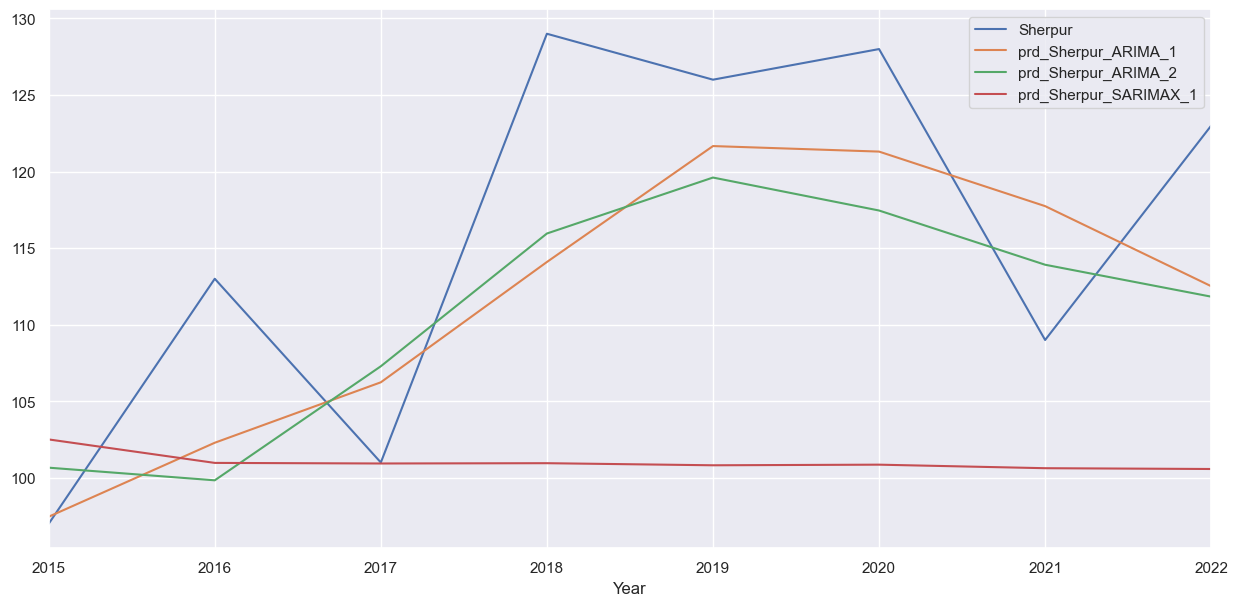

In [80]:
test[['Sherpur','prd_Sherpur_ARIMA_1','prd_Sherpur_ARIMA_2','prd_Sherpur_SARIMAX_1']].plot()

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
ARIMA1_RMSE=np.sqrt(mean_squared_error(test['Sherpur'],test['prd_Sherpur_ARIMA_1']))
ARIMA2_RMSE=np.sqrt(mean_squared_error(test['Sherpur'],test['prd_Sherpur_ARIMA_2']))
SARIMAX1_RMSE=np.sqrt(mean_squared_error(test['Sherpur'],test['prd_Sherpur_SARIMAX_1']))

In [82]:
print(ARIMA1_RMSE)
print(ARIMA2_RMSE)
print(SARIMAX1_RMSE)

8.764671905524752
9.336270869040789
19.05662080804902


In [83]:
import joblib
joblib.dump(model_arima_Sherpur1,'Sherpur.pkl')

['Sherpur.pkl']

# Borda

In [84]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_Borda1=ARIMA(train['Borda'],order=(9, 2, 8)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Borda2=ARIMA(train['Borda'],order=(4, 3, 4)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Borda3=ARIMA(train['Borda'],order=(3, 4, 6)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Borda1 = SARIMAX(train['Borda'],order=(1, 0, 1),seasonal_order=(1,0,1,12)).fit()



C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [85]:

prd1=model_arima_Borda1.predict(start=prd_start,end=prd_end)
prd2=model_arima_Borda2.predict(start=prd_start,end=prd_end)
prd3=model_arima_Borda2.predict(start=prd_start,end=prd_end)
prd4=model_SARIMAX_Borda1.predict(start=prd_start,end=prd_end)



In [86]:
test['prd_Borda_ARIMA_1']=prd1
test['prd_Borda_ARIMA_2']=prd2
test['prd_Borda_ARIMA_3']=prd3
test['prd_Borda_SARIMAX_1']=prd4

In [87]:
test[['Borda','prd_Borda_ARIMA_1','prd_Borda_ARIMA_2','prd_Borda_ARIMA_3','prd_Borda_SARIMAX_1']]

,Borda,prd_Borda_ARIMA_1,prd_Borda_ARIMA_2,prd_Borda_ARIMA_3,prd_Borda_SARIMAX_1
Year,,,,,
2015-01-01,102,95.141629,89.577691,89.577691,80.113955
2016-01-01,102,94.161095,86.676250,86.676250,94.154478
2017-01-01,81,96.340741,97.454215,97.454215,90.403086
2018-01-01,90,79.308125,94.023294,94.023294,94.229439
2019-01-01,90,86.750695,90.758356,90.758356,93.342841
2020-01-01,102,96.538451,101.553104,101.553104,89.399117
2021-01-01,102,93.098569,92.370479,92.370479,88.385674
2022-01-01,114,107.758296,100.190365,100.190365,87.285709


<Axes: xlabel='Year'>

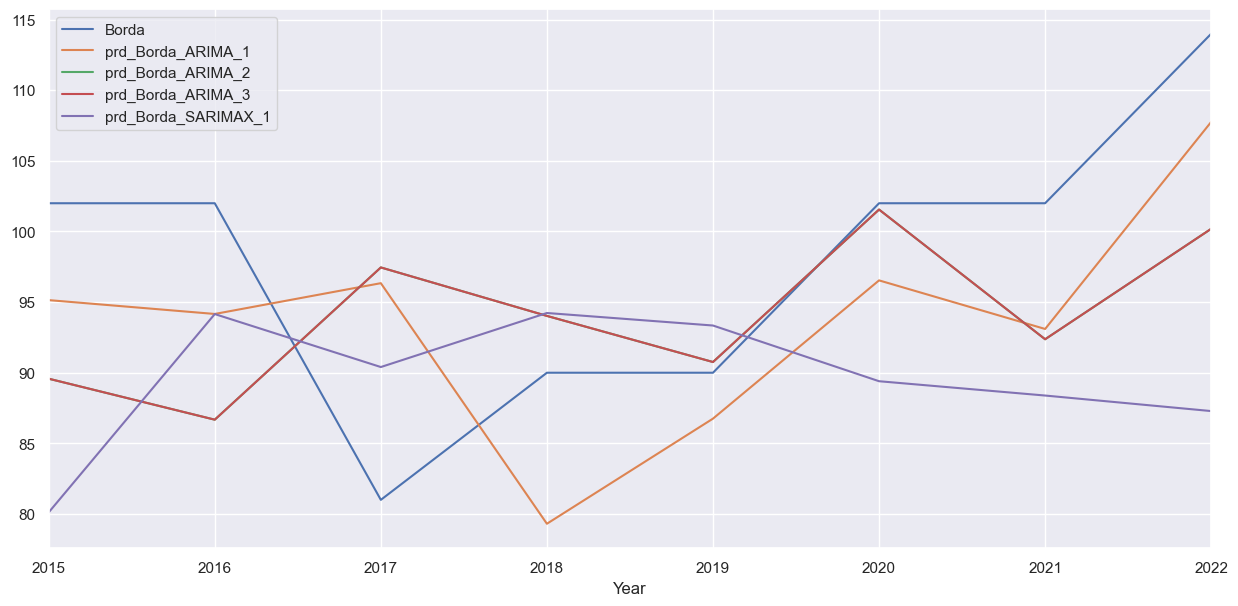

In [88]:
test[['Borda','prd_Borda_ARIMA_1','prd_Borda_ARIMA_2','prd_Borda_ARIMA_3','prd_Borda_SARIMAX_1']].plot()

In [89]:

from sklearn.metrics import mean_squared_error,mean_absolute_error
ARIMA1_RMSE=np.sqrt(mean_squared_error(test['Borda'],test['prd_Borda_ARIMA_1']))
ARIMA2_RMSE=np.sqrt(mean_squared_error(test['Borda'],test['prd_Borda_ARIMA_2']))
ARIMA3_RMSE=np.sqrt(mean_squared_error(test['Borda'],test['prd_Borda_ARIMA_3']))
SARIMAX1_RMSE=np.sqrt(mean_squared_error(test['Borda'],test['prd_Borda_SARIMAX_1']))


In [90]:
print(ARIMA1_RMSE)
print(ARIMA2_RMSE)
print(ARIMA3_RMSE)
print(SARIMAX1_RMSE)

8.780098677033862
10.955978287896539
10.955978287896539
14.645039160674273


In [91]:
import joblib
joblib.dump(model_arima_Borda1,'Borda.pkl')

['Borda.pkl']


# Kushalpura

In [92]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_Kushalpura1=ARIMA(train['Kushalpura'],order=(1,0,7)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Kushalpura2=ARIMA(train['Kushalpura'],order=(7,0,6)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Kushalpura3=ARIMA(train['Kushalpura'],order=(6, 0, 5)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Kushalpura1 = SARIMAX(train['Kushalpura'],order=(0, 0, 2),seasonal_order=(1,0,1,12)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Kushalpura2 = SARIMAX(train['Kushalpura'],order=(1, 0, 2),seasonal_order=(1,0,1,12)).fit()




C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarni

In [93]:

prd1=model_arima_Kushalpura1.predict(start=prd_start,end=prd_end)
prd2=model_arima_Kushalpura2.predict(start=prd_start,end=prd_end)
prd3=model_arima_Kushalpura3.predict(start=prd_start,end=prd_end)
prd4=model_SARIMAX_Kushalpura1.predict(start=prd_start,end=prd_end)
prd5=model_SARIMAX_Kushalpura2.predict(start=prd_start,end=prd_end)



In [94]:
test['prd_Kushalpura_ARIMA_1']=prd1
test['prd_Kushalpura_ARIMA_2']=prd2
test['prd_Kushalpura_ARIMA_3']=prd3
test['prd_Kushalpura_SARIMAX_1']=prd4
test['prd_Kushalpura_SARIMAX_2']=prd5

In [95]:
test[['Kushalpura','prd_Kushalpura_ARIMA_1','prd_Kushalpura_ARIMA_2','prd_Kushalpura_ARIMA_3','prd_Kushalpura_SARIMAX_1','prd_Kushalpura_SARIMAX_2']]

,Kushalpura,prd_Kushalpura_ARIMA_1,prd_Kushalpura_ARIMA_2,prd_Kushalpura_ARIMA_3,prd_Kushalpura_SARIMAX_1,prd_Kushalpura_SARIMAX_2
Year,,,,,,
2015-01-01,31,24.811259,25.512695,27.344518,21.246580,24.259319
2016-01-01,44,35.843175,30.494757,30.253947,22.490168,21.610491
2017-01-01,38,33.186944,33.991995,28.130577,41.320839,29.358355
2018-01-01,50,27.100523,34.020347,33.662331,27.429211,26.193358
2019-01-01,42,25.601879,30.244395,31.967016,33.697054,31.158339
2020-01-01,51,38.540767,36.606807,33.833451,39.489926,34.406304
2021-01-01,44,41.798259,38.204471,36.498546,31.881457,29.050771
2022-01-01,51,34.134777,32.735216,35.193897,28.751390,26.630540


<Axes: xlabel='Year'>

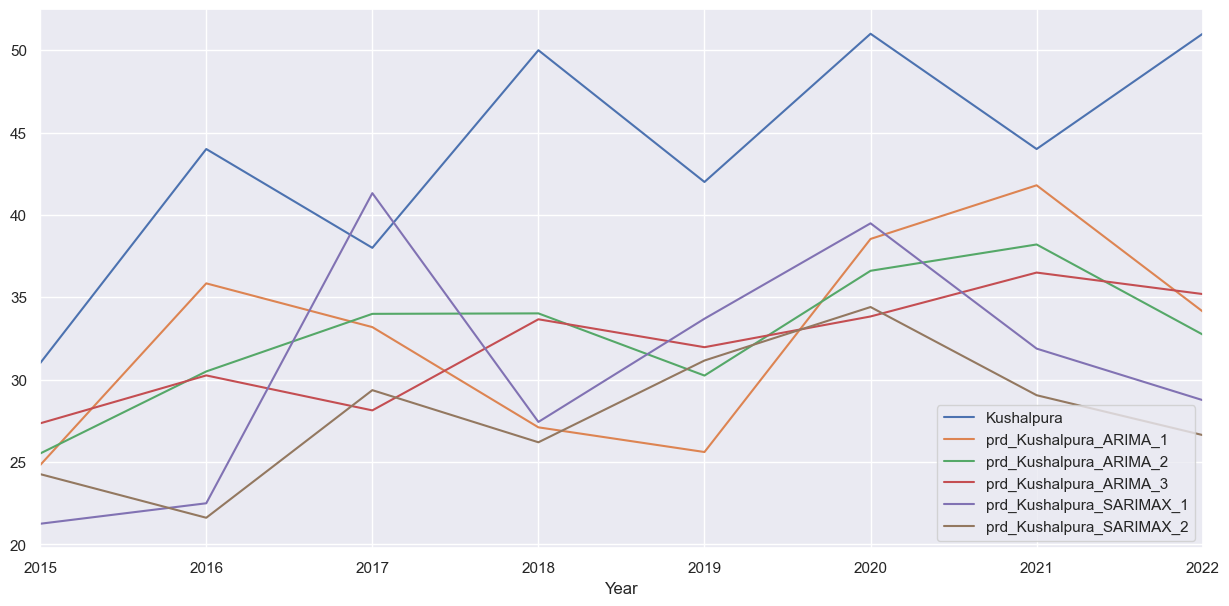

In [96]:
test[['Kushalpura','prd_Kushalpura_ARIMA_1','prd_Kushalpura_ARIMA_2','prd_Kushalpura_ARIMA_3','prd_Kushalpura_SARIMAX_1','prd_Kushalpura_SARIMAX_2']].plot()

In [97]:

from sklearn.metrics import mean_squared_error,mean_absolute_error
ARIMA1_RMSE=np.sqrt(mean_squared_error(test['Kushalpura'],test['prd_Kushalpura_ARIMA_1']))
ARIMA2_RMSE=np.sqrt(mean_squared_error(test['Kushalpura'],test['prd_Kushalpura_ARIMA_2']))
ARIMA3_RMSE=np.sqrt(mean_squared_error(test['Kushalpura'],test['prd_Kushalpura_ARIMA_3']))
SARIMAX1_RMSE=np.sqrt(mean_squared_error(test['Kushalpura'],test['prd_Kushalpura_SARIMAX_1']))
SARIMAX2_RMSE=np.sqrt(mean_squared_error(test['Kushalpura'],test['prd_Kushalpura_SARIMAX_2']))


In [98]:
print(ARIMA1_RMSE)
print(ARIMA2_RMSE)
print(ARIMA3_RMSE)
print(SARIMAX1_RMSE)
print(SARIMAX2_RMSE)


13.066178466398014
12.229392100505294
12.590161653896507
15.498189398339902
17.31474639537174


In [99]:
import joblib
joblib.dump(model_arima_Kushalpura2,'Kushalpura.pkl')

['Kushalpura.pkl']

# Pachama

In [100]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_Pachama1=ARIMA(train['Pachama'],order=(5, 3, 2)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Pachama2=ARIMA(train['Pachama'],order=(1, 3, 1)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Pachama3=ARIMA(train['Pachama'],order=(4, 3, 0)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Pachama1 = SARIMAX(train['Pachama'],order=(0, 0, 2),seasonal_order=(1,0,1,12)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Pachama2 = SARIMAX(train['Pachama'],order=(1, 0, 2),seasonal_order=(1,0,1,12)).fit()




C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
prd1=model_arima_Pachama1.predict(start=prd_start,end=prd_end)
prd2=model_arima_Pachama2.predict(start=prd_start,end=prd_end)
prd3=model_arima_Pachama3.predict(start=prd_start,end=prd_end)
prd4=model_SARIMAX_Pachama1.predict(start=prd_start,end=prd_end)
prd5=model_SARIMAX_Pachama2.predict(start=prd_start,end=prd_end)

In [102]:
test['prd_Pachama_ARIMA_1']=prd1
test['prd_Pachama_ARIMA_2']=prd2
test['prd_Pachama_ARIMA_3']=prd3
test['prd_Pachama_SARIMAX_1']=prd4
test['prd_Pachama_SARIMAX_2']=prd5

In [103]:
test[['Pachama','prd_Pachama_ARIMA_1','prd_Pachama_ARIMA_2','prd_Pachama_ARIMA_3','prd_Pachama_SARIMAX_1','prd_Pachama_SARIMAX_2']]

,Pachama,prd_Pachama_ARIMA_1,prd_Pachama_ARIMA_2,prd_Pachama_ARIMA_3,prd_Pachama_SARIMAX_1,prd_Pachama_SARIMAX_2
Year,,,,,,
2015-01-01,49.0,45.130491,55.176432,61.795918,51.778585,45.477118
2016-01-01,50.0,53.202226,53.448389,60.570059,41.493813,46.133885
2017-01-01,55.0,55.518811,54.597518,69.311211,38.319241,45.833526
2018-01-01,53.0,59.631170,57.743573,78.182702,47.634303,46.379086
2019-01-01,49.0,62.093225,59.680027,90.722717,27.681992,44.513560
2020-01-01,52.0,65.463090,62.348242,103.328580,51.512680,46.295735
2021-01-01,59.0,67.674011,64.572837,119.336368,43.686739,45.552191
2022-01-01,65.0,71.633964,67.065437,134.427174,30.773516,44.505612


<Axes: xlabel='Year'>

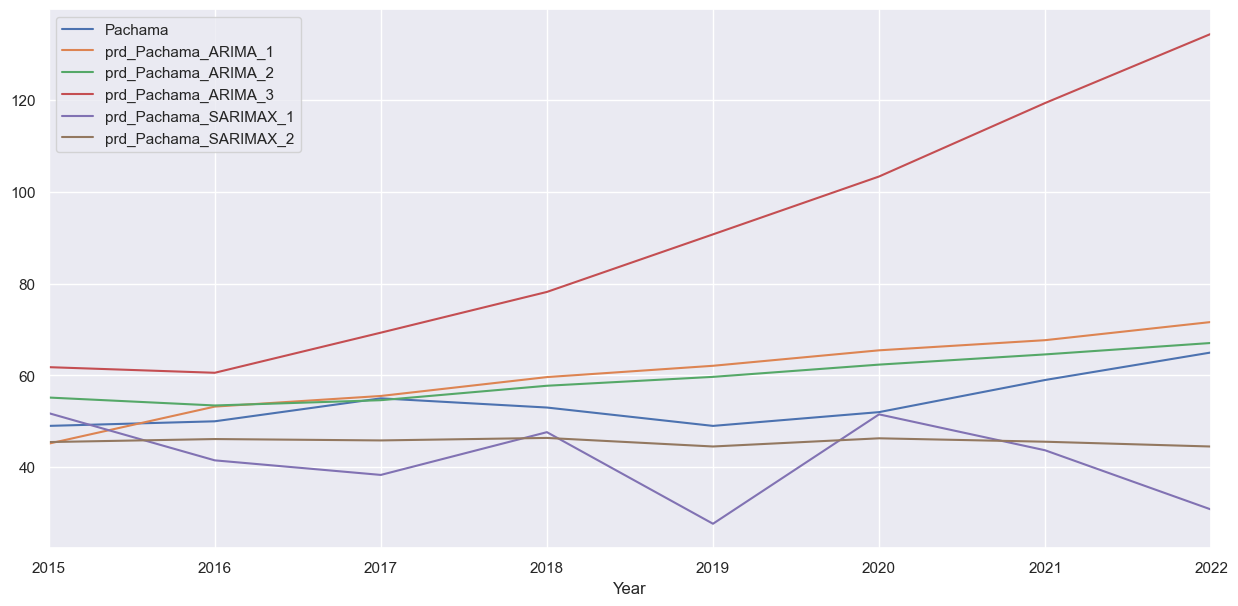

In [104]:
test[['Pachama','prd_Pachama_ARIMA_1','prd_Pachama_ARIMA_2','prd_Pachama_ARIMA_3','prd_Pachama_SARIMAX_1','prd_Pachama_SARIMAX_2']].plot()

In [105]:

from sklearn.metrics import mean_squared_error,mean_absolute_error
ARIMA1_RMSE=np.sqrt(mean_squared_error(test['Pachama'],test['prd_Pachama_ARIMA_1']))
ARIMA2_RMSE=np.sqrt(mean_squared_error(test['Pachama'],test['prd_Pachama_ARIMA_2']))
ARIMA3_RMSE=np.sqrt(mean_squared_error(test['Pachama'],test['prd_Pachama_ARIMA_3']))
SARIMAX1_RMSE=np.sqrt(mean_squared_error(test['Pachama'],test['prd_Pachama_SARIMAX_1']))
SARIMAX2_RMSE=np.sqrt(mean_squared_error(test['Pachama'],test['prd_Pachama_SARIMAX_2']))


In [106]:
print(ARIMA1_RMSE)
print(ARIMA2_RMSE)
print(ARIMA3_RMSE)
print(SARIMAX1_RMSE)
print(SARIMAX2_RMSE)

8.226513739495896
6.414581159471271
41.758919508411005
16.76214957255884
10.054529819838505


In [107]:
import joblib
joblib.dump(model_arima_Pachama2,'Pachama.pkl')

['Pachama.pkl']

# Kharpa

In [142]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_Kharpa1=ARIMA(train['Kharpa'],order=(6, 2, 3)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Kharpa2=ARIMA(train['Kharpa'],order=(0, 1,2)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Kharpa3=ARIMA(train['Kharpa'],order=(4, 3, 0)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Kharpa1 = SARIMAX(train['Kharpa'],order=(0, 0, 2),seasonal_order=(1,0,1,12)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Kharpa2 = SARIMAX(train['Kharpa'],order=(1, 0, 2),seasonal_order=(1,0,1,12)).fit()




C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [143]:
prd1=model_arima_Kharpa1.predict(start=prd_start,end=prd_end)
prd2=model_arima_Kharpa2.predict(start=prd_start,end=prd_end)
prd3=model_arima_Kharpa3.predict(start=prd_start,end=prd_end)
prd4=model_SARIMAX_Kharpa1.predict(start=prd_start,end=prd_end)
prd5=model_SARIMAX_Kharpa2.predict(start=prd_start,end=prd_end)

In [144]:
test['prd_Kharpa_ARIMA_1']=prd1
test['prd_Kharpa_ARIMA_2']=prd2
test['prd_Kharpa_ARIMA_3']=prd3
test['prd_Kharpa_SARIMAX_1']=prd4
test['prd_Kharpa_SARIMAX_2']=prd5


In [145]:
test[['Kharpa','prd_Kharpa_ARIMA_1','prd_Kharpa_ARIMA_2','prd_Kharpa_ARIMA_3','prd_Kharpa_SARIMAX_1','prd_Kharpa_SARIMAX_2']]

,Kharpa,prd_Kharpa_ARIMA_1,prd_Kharpa_ARIMA_2,prd_Kharpa_ARIMA_3,prd_Kharpa_SARIMAX_1,prd_Kharpa_SARIMAX_2
Year,,,,,,
2015-01-01,50.0,NaN,NaN,NaN,NaN,NaN
2016-01-01,65.0,NaN,NaN,NaN,NaN,NaN
2017-01-01,54.0,NaN,NaN,NaN,NaN,NaN
2018-01-01,46.0,NaN,NaN,NaN,NaN,NaN
2019-01-01,44.0,NaN,NaN,NaN,NaN,NaN
2020-01-01,65.0,58.548089,47.172831,-21.029031,43.430153,46.621880
2021-01-01,53.0,56.327211,47.172831,-46.446483,39.826830,46.649229
2022-01-01,50.0,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Year'>

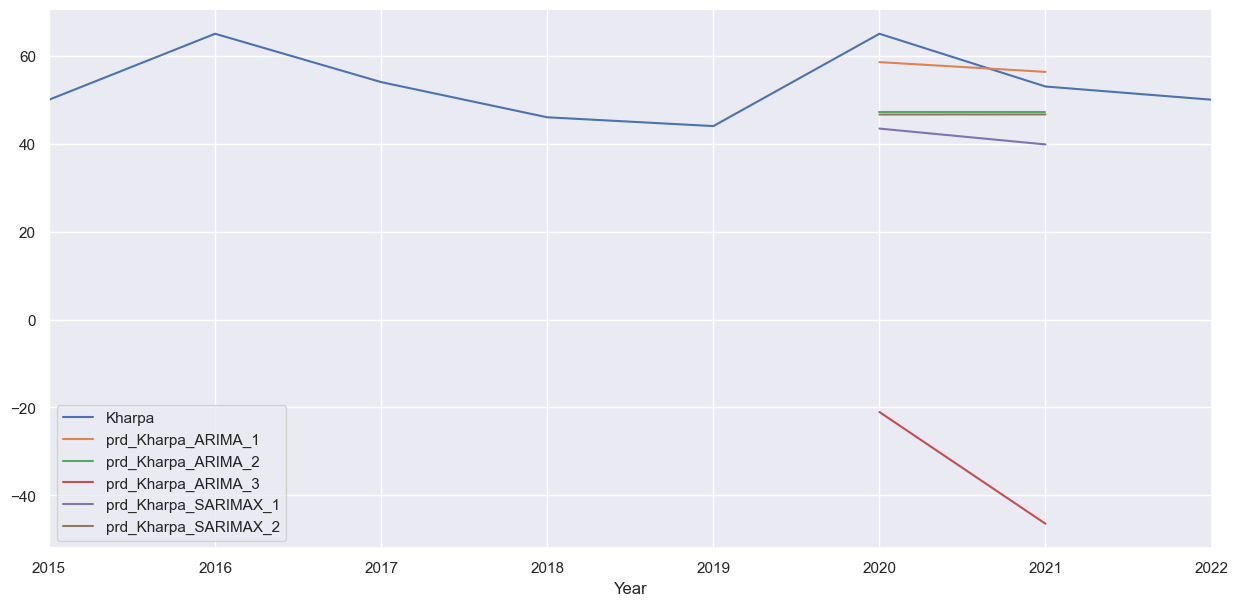

In [141]:
test[['Kharpa','prd_Kharpa_ARIMA_1','prd_Kharpa_ARIMA_2','prd_Kharpa_ARIMA_3','prd_Kharpa_SARIMAX_1','prd_Kharpa_SARIMAX_2']].plot()

In [113]:

from sklearn.metrics import mean_squared_error,mean_absolute_error
ARIMA1_RMSE=np.sqrt(mean_squared_error(test['Kharpa'],test['prd_Kharpa_ARIMA_1']))
ARIMA2_RMSE=np.sqrt(mean_squared_error(test['Kharpa'],test['prd_Kharpa_ARIMA_2']))
ARIMA3_RMSE=np.sqrt(mean_squared_error(test['Kharpa'],test['prd_Kharpa_ARIMA_3']))
SARIMAX1_RMSE=np.sqrt(mean_squared_error(test['Kharpa'],test['prd_Kharpa_SARIMAX_1']))
SARIMAX2_RMSE=np.sqrt(mean_squared_error(test['Kharpa'],test['prd_Kharpa_SARIMAX_2']))


In [114]:
print(ARIMA1_RMSE)
print(ARIMA2_RMSE)
print(ARIMA3_RMSE)
print(SARIMAX1_RMSE)
print(SARIMAX2_RMSE)

8.385926020771446
11.078853252035257
68.38124805021101
18.795115158940895
11.268494012145668


In [115]:
import joblib
joblib.dump(model_arima_Kharpa1,'Kharpa.pkl')

['Kharpa.pkl']

# Ahmadpur

In [129]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_Ahmadpur1=ARIMA(train['Ahmadpur'],order=(3, 2, 3)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Ahmadpur2=ARIMA(train['Ahmadpur'],order=(7, 2,3)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Ahmadpur3=ARIMA(train['Ahmadpur'],order=(1, 1, 5)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Ahmadpur1 = SARIMAX(train['Ahmadpur'],order=(0, 0, 2),seasonal_order=(1,0,1,12)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Ahmadpur2 = SARIMAX(train['Ahmadpur'],order=(1, 0, 2),seasonal_order=(1,0,1,12)).fit()




C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [133]:
prd1=model_arima_Ahmadpur1.predict(start=prd_start,end=prd_end)
prd2=model_arima_Ahmadpur2.predict(start=prd_start,end=prd_end)
prd3=model_arima_Ahmadpur3.predict(start=prd_start,end=prd_end)
prd4=model_SARIMAX_Ahmadpur1.predict(start=prd_start,end=prd_end)
prd5=model_SARIMAX_Ahmadpur2.predict(start=prd_start,end=prd_end)

In [134]:
test['prd_Ahmadpur_ARIMA_1']=prd1
test['prd_Ahmadpur_ARIMA_2']=prd2
test['prd_Ahmadpur_ARIMA_3']=prd3
test['prd_Ahmadpur_SARIMAX_1']=prd4
test['prd_Ahmadpur_SARIMAX_2']=prd5

In [135]:
test[['Ahmadpur','prd_Ahmadpur_ARIMA_1','prd_Ahmadpur_ARIMA_2','prd_Ahmadpur_ARIMA_3','prd_Ahmadpur_SARIMAX_1','prd_Ahmadpur_SARIMAX_2']]

,Ahmadpur,prd_Ahmadpur_ARIMA_1,prd_Ahmadpur_ARIMA_2,prd_Ahmadpur_ARIMA_3,prd_Ahmadpur_SARIMAX_1,prd_Ahmadpur_SARIMAX_2
Year,,,,,,
2015-01-01,113,NaN,NaN,NaN,NaN,NaN
2016-01-01,65,NaN,NaN,NaN,NaN,NaN
2017-01-01,64,NaN,NaN,NaN,NaN,NaN
2018-01-01,104,NaN,NaN,NaN,NaN,NaN
2019-01-01,75,NaN,NaN,NaN,NaN,NaN
2020-01-01,83,84.67473,83.978169,94.232006,72.438572,98.815573
2021-01-01,98,92.91247,90.889458,94.859806,54.629462,90.264451
2022-01-01,112,NaN,NaN,NaN,NaN,NaN


# Hirapur

In [116]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_Hirapur1=ARIMA(train['Hirapur'],order=(6, 2, 3)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Hirapur2=ARIMA(train['Hirapur'],order=(7, 2,3)).fit()

from statsmodels.tsa.arima.model import ARIMA
model_arima_Hirapur3=ARIMA(train['Hirapur'],order=(1, 1, 5)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Hirapur1 = SARIMAX(train['Hirapur'],order=(0, 0, 2),seasonal_order=(1,0,1,12)).fit()


from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX_Hirapur2 = SARIMAX(train['Hirapur'],order=(1, 0, 2),seasonal_order=(1,0,1,12)).fit()




C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shekhar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
prd1=model_arima_Hirapur1.predict(start=prd_start,end=prd_end)
prd2=model_arima_Hirapur2.predict(start=prd_start,end=prd_end)
prd3=model_arima_Hirapur3.predict(start=prd_start,end=prd_end)
prd4=model_SARIMAX_Hirapur1.predict(start=prd_start,end=prd_end)
prd5=model_SARIMAX_Hirapur2.predict(start=prd_start,end=prd_end)

In [118]:
test['prd_Hirapur_ARIMA_1']=prd1
test['prd_Hirapur_ARIMA_2']=prd2
test['prd_Hirapur_ARIMA_3']=prd3
test['prd_Hirapur_SARIMAX_1']=prd4
test['prd_Hirapur_SARIMAX_2']=prd5

In [119]:
test[['Hirapur','prd_Hirapur_ARIMA_1','prd_Hirapur_ARIMA_2','prd_Hirapur_ARIMA_3','prd_Hirapur_SARIMAX_1','prd_Hirapur_SARIMAX_2']]

,Hirapur,prd_Hirapur_ARIMA_1,prd_Hirapur_ARIMA_2,prd_Hirapur_ARIMA_3,prd_Hirapur_SARIMAX_1,prd_Hirapur_SARIMAX_2
Year,,,,,,
2015-01-01,56,45.043454,44.202443,45.141312,35.292983,45.332976
2016-01-01,67,57.761255,55.269489,53.516413,64.731100,52.127329
2017-01-01,69,54.011381,50.568314,48.571038,52.511365,52.402432
2018-01-01,70,58.672948,55.813266,51.181879,39.265691,52.564026
2019-01-01,49,56.679169,55.053972,45.071512,34.330209,51.536874
2020-01-01,62,57.661631,60.087675,43.617846,25.232988,48.576190
2021-01-01,45,57.634798,64.163286,42.648324,30.980116,47.626413
2022-01-01,70,58.620914,70.723973,42.001703,32.499773,46.510838


<Axes: xlabel='Year'>

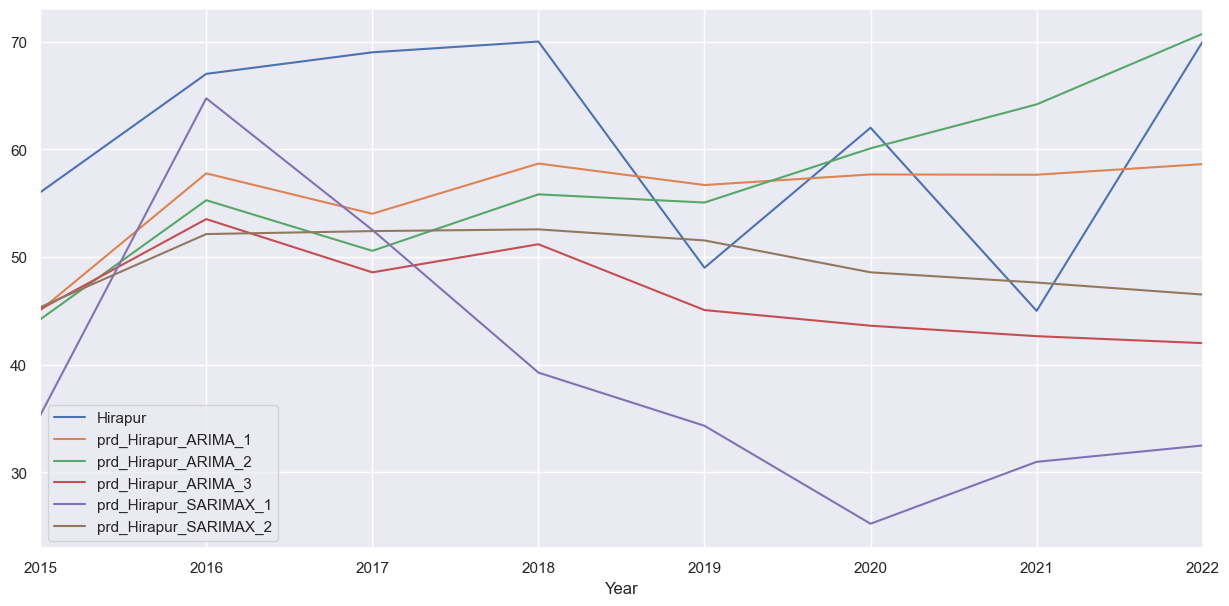

In [120]:
test[['Hirapur','prd_Hirapur_ARIMA_1','prd_Hirapur_ARIMA_2','prd_Hirapur_ARIMA_3','prd_Hirapur_SARIMAX_1','prd_Hirapur_SARIMAX_2']].plot()

In [121]:

from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
ARIMA1_RMSE=np.sqrt(mean_squared_error(test['Hirapur'],test['prd_Hirapur_ARIMA_1']))
ARIMA2_RMSE=np.sqrt(mean_squared_error(test['Hirapur'],test['prd_Hirapur_ARIMA_2']))
ARIMA3_RMSE=np.sqrt(mean_squared_error(test['Hirapur'],test['prd_Hirapur_ARIMA_3']))
SARIMAX1_RMSE=np.sqrt(mean_squared_error(test['Hirapur'],test['prd_Hirapur_SARIMAX_1']))
SARIMAX2_RMSE=np.sqrt(mean_squared_error(test['Hirapur'],test['prd_Hirapur_SARIMAX_2']))


In [122]:
print(ARIMA1_RMSE)
print(ARIMA2_RMSE)
print(ARIMA3_RMSE)
print(SARIMAX1_RMSE)
print(SARIMAX2_RMSE)

10.754498393439203
12.378615447426974
16.63563202447376
24.546490197007078
14.403763975884207


In [123]:
model=joblib.load('Hirapur.pkl')
i=2020
prd_start=pd.to_datetime(f'{i}-01-01')
prd_end=pd.to_datetime(f'{i+1}-01-01')
X,Y=model.predict(start=prd_start,end=prd_end)
print(X)

57.661630654784325
